# CS 105 Mini Project

**Team**: Thomas Henningson, Josh Pennington, Suhail-Anand Dhilon, Cameron Tsai <br><br>
This is our CS 105 Mini Project.

# Introduction

**Question 1**: What data do you have?

1. What is your cumulative GPA as of Winter 2022?
2. What was your GPA your very first quarter at UCR?
3. What is your gender?
4. What is your age?
5. How many STEM advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
6. How many social studies/arts advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
7. How often do you procrastinate?
8. Rate the importance of your education in your life on a scale of 1-10
9. Rate the enjoyment/fufillment you receive from education on a scale of 1-10
10. How many hours do you study per week on average (not including homework)?

**Question 2**: What would you like to know?

Does taking advanced courses in high school have a postive effect on student's grades, study habits, and outlook on education in college?

# Exploring the Data

First, we will remove all of the unnecessary rows for our question and clean the data

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

data = pd.read_csv("CS105_Survey.csv")

inds = [1, 2, 3, 5, 6, 7, 9, 15, 16, 17, 18, 19, 20, 21, 23, 31, 32, 33, 43, 46, 48, 58, 59, 70, 75, 76, 77, 79]

data = data.iloc[:,inds]

data.to_csv("cleaned.csv")

Next, we will calculate...

In [78]:
# Pulling the advanced courses from the data
gpa_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0")

sumCourses = gpa_courses.iloc[:,1:3].astype(int).sum(axis=1)
sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],right=False)

yearOneGPA = gpa_courses.iloc[:,0].astype(float)
yearOneGPA = pd.cut(yearOneGPA,bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.1],right=False)

table = pd.crosstab(sumCourses, yearOneGPA)
display(table)
c, p, dof, expected = chi2_contingency(table)
print(c, p, dof)

What was your approximate GPA for your first year at UCR?,"[2.0, 2.5)","[2.5, 3.0)","[3.0, 3.5)","[3.5, 4.1)"
row_0,,,,
"[0, 3)",1,1,4,6
"[3, 6)",0,1,1,9
"[6, 9)",0,0,3,4
"[9, 12)",0,3,1,4
"[12, 15)",0,0,0,6
"[15, 30)",0,0,0,5


20.215914042384632 0.1638055038546715 15


<AxesSubplot:>

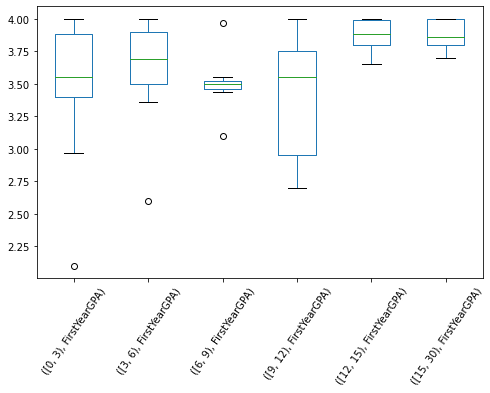

In [79]:
fyGPA_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = fyGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],right=False)

df["FirstYearGPA"] = fyGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

<AxesSubplot:>

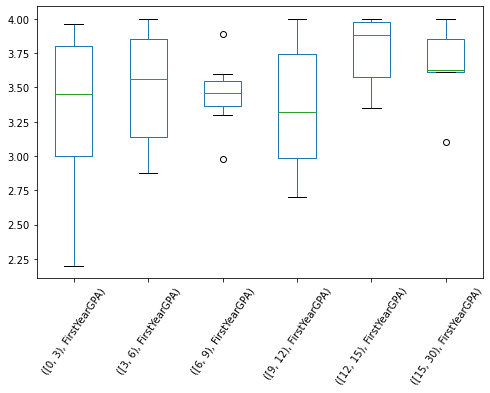

In [80]:
curGPA_courses = data.iloc[:,[3,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = curGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],right=False)

df["FirstYearGPA"] = curGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)


Scatter plot
	GPA vs # courses taken
	study hours vs # courses
	study hours to GPA

Histogram

Pie chart
	Gender?

Bar chart
	GPA distribution
	Advanced courses distribution

Box Plot
	Distribution of first quarter GPA and overall GPA, for each bin of # courses?

# Hypothesis

uhh